# Lab2 Report: Exploring Text Data
Team member:  Chuhan Jin/ Yichen Duan/ Jingzhen Hu
# 1. Business Understanding
Our dataset comes from Kaggle (https://www.kaggle.com/asad1m9a9h6mood/news-articles). There are news articles related to business and sports from 2015 till date. It Contains the Heading of the particular Article, its content and its date. The content also contains the place from where the statement or Article was published. The data involves 2692 documents in total. We chose our data because either the business or the sports topics are heated in recent year. We would like to use our dataset to predict the label (NewsType: business or sports) of other input articles (content). If we can identify the news of the most hot topics (business or sports), then it is a way to make a perdiction on click rate, etc.

# 2. Data Encoding

In [193]:
import pandas as pd

at = pd.read_csv('Articles.csv',encoding="ISO-8859-1")
at.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [194]:
at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 4 columns):
Article     2692 non-null object
Date        2692 non-null object
Heading     2692 non-null object
NewsType    2692 non-null object
dtypes: object(4)
memory usage: 84.2+ KB


In [195]:
pd.unique(at["NewsType"][:])

array(['business', 'sports'], dtype=object)

In [196]:
bus = at[at['NewsType']=='business']
bus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 2691
Data columns (total 4 columns):
Article     1284 non-null object
Date        1284 non-null object
Heading     1284 non-null object
NewsType    1284 non-null object
dtypes: object(4)
memory usage: 50.2+ KB


In [197]:
sport = at[at['NewsType']=='sports']
sport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408 entries, 1021 to 2428
Data columns (total 4 columns):
Article     1408 non-null object
Date        1408 non-null object
Heading     1408 non-null object
NewsType    1408 non-null object
dtypes: object(4)
memory usage: 55.0+ KB


We reomove stopwords here and make our content of articles into a string list in order to convert them into a bad of word and to compute tf-idf later.

In [198]:
import nltk
import re
from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# porter_stemmer = PorterStemmer()

summary_text = []
for index in range(0,at['Article'].count()):
    voc = re.sub('[^a-zA-Z]+', ' ', at["Article"][index]).lower()
# stemming, we tried it but the results seem to be unreliable
#     voc_list = voc.split(' ')
#     i = 0
#     for word in voc_list:
#         voc_list[i] = porter_stemmer.stem(word) 
#         i+=1 
#     voc = ' '.join(str(x) for x in voc_list)
    
    for word in stopwords.words('english'): # iterate over word_list
        voc = re.sub('\s{0}\s'.format(word), ' ', voc) 
    at["Article"][index] = voc
    summary_text.append(voc)

summary_text[0:10] # print the first tenth article content


['karachi sindh government decided bring public transport fares per cent due massive reduction petroleum product prices federal government geo news reported sources said reduction fares applicable public transport rickshaw taxi means traveling meanwhile karachi transport ittehad kti refused abide government decision kti president irshad bukhari said commuters charged lowest fares karachi compare parts country adding pc vehicles run compressed natural gas cng bukhari said karachi transporters cut fares decrease cng prices made ',
 'hong kong asian markets started upswing limited trading friday mainland chinese stocks surging hong kong speculation beijing may ease monetary policy boost slowing growth hong kong rose percent closing points higher seoul closed percent rising points sydney gained percent points close singapore edged percent gaining points markets mainland china japan taiwan new zealand philippines thailand remained closed holidays mainland bourses shut january shares chinese

In [199]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() # an object capable of counting words in a document!

bag_words = count_vect.fit_transform(summary_text)

In [200]:
print(bag_words.shape) # this is a sparse matrix
print('=========')
print(bag_words[0]) # the word frequency of the first document in dataset

(2692, 25402)
  (0, 13081)	1
  (0, 5506)	1
  (0, 5219)	1
  (0, 23314)	1
  (0, 4126)	2
  (0, 8837)	1
  (0, 14628)	1
  (0, 4426)	1
  (0, 18963)	1
  (0, 24199)	1
  (0, 16005)	1
  (0, 253)	1
  (0, 4923)	1
  (0, 15883)	1
  (0, 4348)	1
  (0, 12960)	1
  (0, 3699)	1
  (0, 4336)	1
  (0, 3027)	2
  (0, 11245)	1
  (0, 16860)	1
  (0, 5485)	1
  (0, 50)	1
  (0, 18022)	1
  (0, 12162)	2
  :	:
  (0, 22553)	1
  (0, 18620)	1
  (0, 1092)	1
  (0, 19084)	3
  (0, 20662)	1
  (0, 18301)	1
  (0, 14812)	1
  (0, 8936)	1
  (0, 7925)	1
  (0, 16907)	2
  (0, 17013)	1
  (0, 16223)	1
  (0, 17949)	2
  (0, 13466)	1
  (0, 6596)	1
  (0, 3539)	1
  (0, 16096)	1
  (0, 7803)	4
  (0, 23311)	3
  (0, 17225)	2
  (0, 2901)	1
  (0, 5477)	1
  (0, 9200)	3
  (0, 20235)	1
  (0, 11772)	4


In [201]:
print(len(count_vect.vocabulary_))
# since print the whole vocabulary is too large, we only choose print one or two words to test
print(' '.join(['The word eurepean has term frequency ', str(count_vect.vocabulary_['european'])]))
                

25402
The word eurepean has term frequency  7349


In [202]:
pd.options.display.max_columns = 999
df = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())

In [203]:
df.sum().sort_values()[-10:]

also        1945
two         1962
oil         1977
world       2103
strong      2285
first       2391
year        2941
pakistan    3229
percent     3318
said        6043
dtype: int64

Here, we can see the most frequenct words are not quite representative based on our data since the word "said" and "percent" are most common words in general. Thus, we compute the tf-idf to select the key word later.

## TF-IDF Conversion


In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer() # an object capable of counting words in a document!

tfidf_mat = tfidf_vect.fit_transform(summary_text) # that's it! its converted!!

In [205]:
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df.max().sort_values()[-20:]

carr         0.669816
akd          0.674508
kinnow       0.674814
halal        0.675203
cng          0.676201
tesco        0.684705
coin         0.684779
fifa         0.686499
bpd          0.703785
lpg          0.711193
broadband    0.717746
edhi         0.718505
dates        0.750866
cotton       0.767944
trillion     0.770805
engines      0.777106
keys         0.781720
br           0.783921
poultry      0.790130
polo         0.794065
dtype: float64

# 3. Data Visualization

In [206]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

(0.65, 0.8)

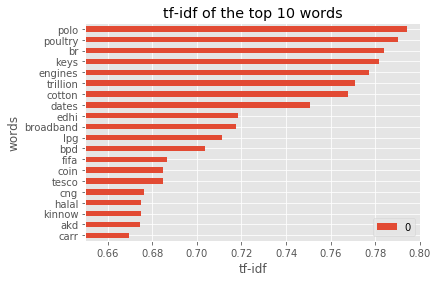

In [207]:
plt.style.use('ggplot')
plot1 = pd.DataFrame(df.max().sort_values()[-20:])
# plot1.index = plot1.country
ax = plot1.plot(kind='barh')
plt.title('tf-idf of the top 10 words')
plt.xlabel('tf-idf')
plt.ylabel('words')
axes = plt.gca()
axes.set_xlim([0.65,0.8]) # zoom in the range of difference

After we calculated tf-idf value for each vocabulary, we sorted them and oreder them from highest to lowest. Then we list the tob 20 frequent words which implied by their tf-idf values in our dataset. By inspecting this graph, we can conclude polo is the word which appeared in our dataset most frequently. Its tf-idf value is over 0.79, very high. But this graph is not enough for us to do more analystics, so we decide to use box-plot to see the distribution of tf-idf of those frequent words.

In [208]:
top_words = df.max().sort_values()[-20:]
words = []
top_asso_bus = []
top_asso_sport = []
idx = 0
for item in top_words.index: 
    words.append(item)
    top_asso_bus.append(0)
    top_asso_sport.append(0)
    for index in range(0,at['Article'].count()):
        if item in at['Article'][index]:
            if at['NewsType'][index] == 'business':
                top_asso_bus[idx] += 1
            else:
                top_asso_sport[idx] += 1
    idx += 1
# normalize the frequency
for i in range(0,20):
    total = top_asso_bus[i] + top_asso_sport[i]
    top_asso_bus[i] = top_asso_bus[i]/total
    top_asso_sport[i] = top_asso_sport[i]/total
# print(top_asso_bus)
# print(top_asso_sport)
# print(words)

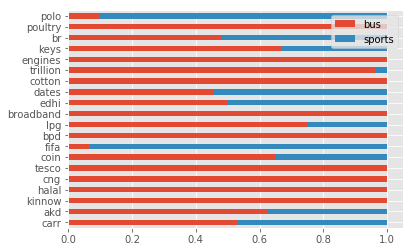

In [209]:
plt.style.use('ggplot')
plot2 = pd.DataFrame({"word":words,"bus":top_asso_bus,"sports":top_asso_sport})
ax = plot2.plot(kind='barh', 
                   stacked=True)
ax.set_yticklabels(plot2.word) 
plt.show()

The plot above gives the top 20 important words in the dataset and its related to either business or sports. The meaning behind this figure is to figure out words that is most related to one type of news which can be a feature (influence more than other words in predicting label - News Type here). For example, the words kinnow, halal, cng, tesco, bpd, broadband, cotton, engines, and poultry are totally belonging to business type while the words polo, fifa are two most related to sports news type. Thus, those words mentioned above can be chosen as a indication to classify the new type later.

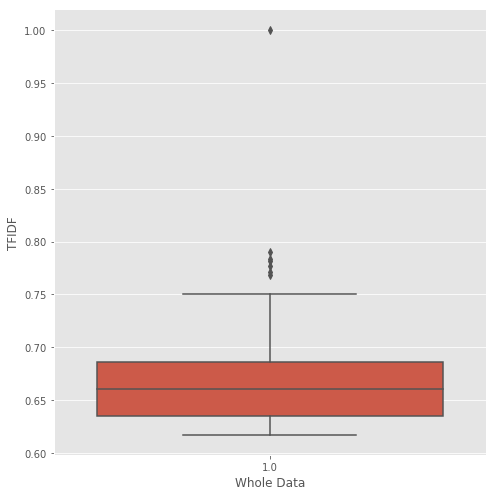

In [210]:
import seaborn as sns
vio = df.max().sort_values()[-50:].values
violin = (50,2)
violin = np.ones(violin)
for i in range(0,49):
    violin[i][1] = vio[i]
colname = ["Whole Data","TFIDF"]
vioplot = pd.DataFrame(data = violin, columns = colname)
sns.factorplot(x='Whole Data',y='TFIDF',data = vioplot, kind='box', size=7,ci=95)

The box-plot graph indicates we have tense distribution of tf-idf values of top 20 frequent words. Most of frequent words have tf-idf value between 0.75 to somewhere around 0.62. There are few words have high tf-idf; also the graph shows one extrem value which tf-idf is 1, but based on the previous information this value should be a mistake, because our highest tf-idf value is 0.79.

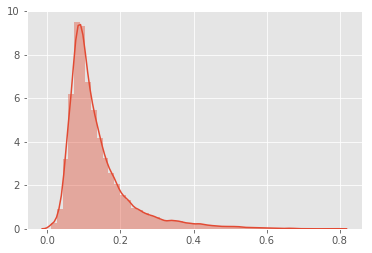

In [211]:
sns.distplot(df.max())

The distribution plot graph tells us in general case, most of vocabularies have tf-idf betwwen 0.05 to 0.2. and the graph also shows right tail feature. This feature indicates when tf-idf values increase, the number of words asscociates with that value decreases sharply.

In [212]:
for index, row in at.iterrows():
    row["Article"] = len(row["Article"])
at['Article'] = pd.cut(at['Article'],[0,1000,2000,3000,1e6],
                                 labels=['short','regular','long','very long'])
bus = at[at['NewsType']=='business']
sport = at[at['NewsType'] == 'sports']
sport.head()

,Article,Date,Heading,NewsType
1021,short,1/1/2016,Amir returns to Pakistan squad after 5 year b,sports
1022,regular,1/1/2016,Australia set to test twin spin attack against...,sports
1023,long,1/2/2016,Australia skipper Smith plots return to test s...,sports
1024,regular,1/3/2016,McCullum says Amir should get benefit of doub,sports
1025,regular,1/3/2016,England declare on 629 6 on record breaking day,sports


In [213]:
buscounted = bus["Article"].value_counts()
sportcounted = sport["Article"].value_counts()
lengraph = [[1,1], [1,1], [1,1],[1,1]]
for i in range (0,4):
    for j in range (0,2):
        if j == 0:
            lengraph[i][j] = buscounted.values[i]
        else:
            lengraph[i][j] = sportcounted.values[i]
for i in range (0,4):
    total = lengraph[i][0] + lengraph[i][1]
    lengraph[i][0] = lengraph[i][0]/ total
    lengraph[i][1] = lengraph[i][1]/ total
lengraph

[[0.48256285482562855, 0.51743714517437145],
 [0.4151291512915129, 0.58487084870848705],
 [0.59666666666666668, 0.40333333333333332],
 [0.80000000000000004, 0.20000000000000001]]

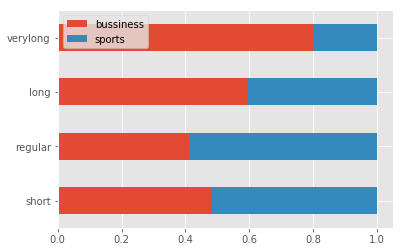

In [214]:
leng_graph = pd.DataFrame(data = lengraph, columns = ["bussiness","sports"])
ax = leng_graph.plot(kind="barh",stacked = True)
ax.set_yticklabels(["short","regular","long","verylong"])
plt.show()

After we normalized article length in both bussiness and sports type of news, we combined them to generate the graph above. This graph has very clear feature that bussiness news tend to have longer articles than sports news. However, sports news tend to have shorter articles than bussiness news. It also could be a feature to classify business or sports news type - our label.

# 4 Word Cloud


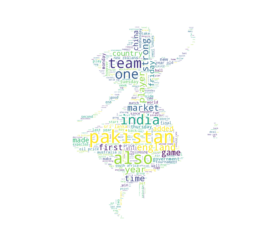

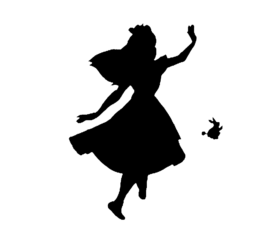

In [215]:
# refer to https://github.com/amueller/word_cloud
import wordcloud
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

d = path.dirname('./')
text = ' '.join(summary_text)
# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=200000000000000, mask=alice_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

We are using word cloud to represent the term frequency of single words. Larger word size means higher term frequency of certain word. From the word cloud graph we generated, we can see that "pakistan" is the word with highest term frequency in the whole dataset. Since this is the word cloud for the whole data set, country names have highest opportunity to appear in the documents, because they can be in both business and sports news. It is reasonable that this kind of words like pakista, india, england have much impact on our dataset. In addition, besides the word "also", market is undoubtedly an eptiome of business news type and team is related to sports news type. By the way, Alice is beautiful :)